In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Diabetes 130-US hospitals for years 1999-2008 Data Set

## Test analysis of public data from a medical institution in the United States.

Source:

The data are submitted on behalf of the Center for Clinical and Translational Research, Virginia Commonwealth University, a recipient of NIH CTSA grant UL1 TR00058 and a recipient of the CERNER data. John Clore (jclore '@' vcu.edu), Krzysztof J. Cios (kcios '@' vcu.edu), Jon DeShazo (jpdeshazo '@' vcu.edu), and Beata Strack (strackb '@' vcu.edu). This data is a de-identified abstract of the Health Facts database (Cerner Corporation, Kansas City, MO).


Data Set Information:

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
(1) It is an inpatient encounter (a hospital admission).
(2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
(3) The length of stay was at least 1 day and at most 14 days.
(4) Laboratory tests were performed during the encounter.
(5) Medications were administered during the encounter.
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.


Attribute Information:

Detailed description of all the atrributes is provided in Table 1 Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.


Relevant Papers:

Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.

Citation Request:

Please cite:
Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.

https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#

In [3]:
# getting data
data = pd.read_csv('diabetic_data.csv')
id_names = pd.read_csv('IDs_mapping.csv')

In [67]:
data.replace('?', np.NAN, inplace=True) # replacing ? with None

In [68]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [81]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
objects = ['object']

newdf = data.select_dtypes(include=numerics) # getting only numerical types
newdf_obj = data.select_dtypes(include=objects)

In [125]:
ned = pd.DataFrame(data.isnull().sum() / len(data)) #number of null
ned[ned[0] > 0].sort_values(by=0, ascending=False)

,0
weight,0.968585
medical_specialty,0.490822
payer_code,0.395574
race,0.022336
diag_3,0.013983
diag_2,0.003518
diag_1,0.000206


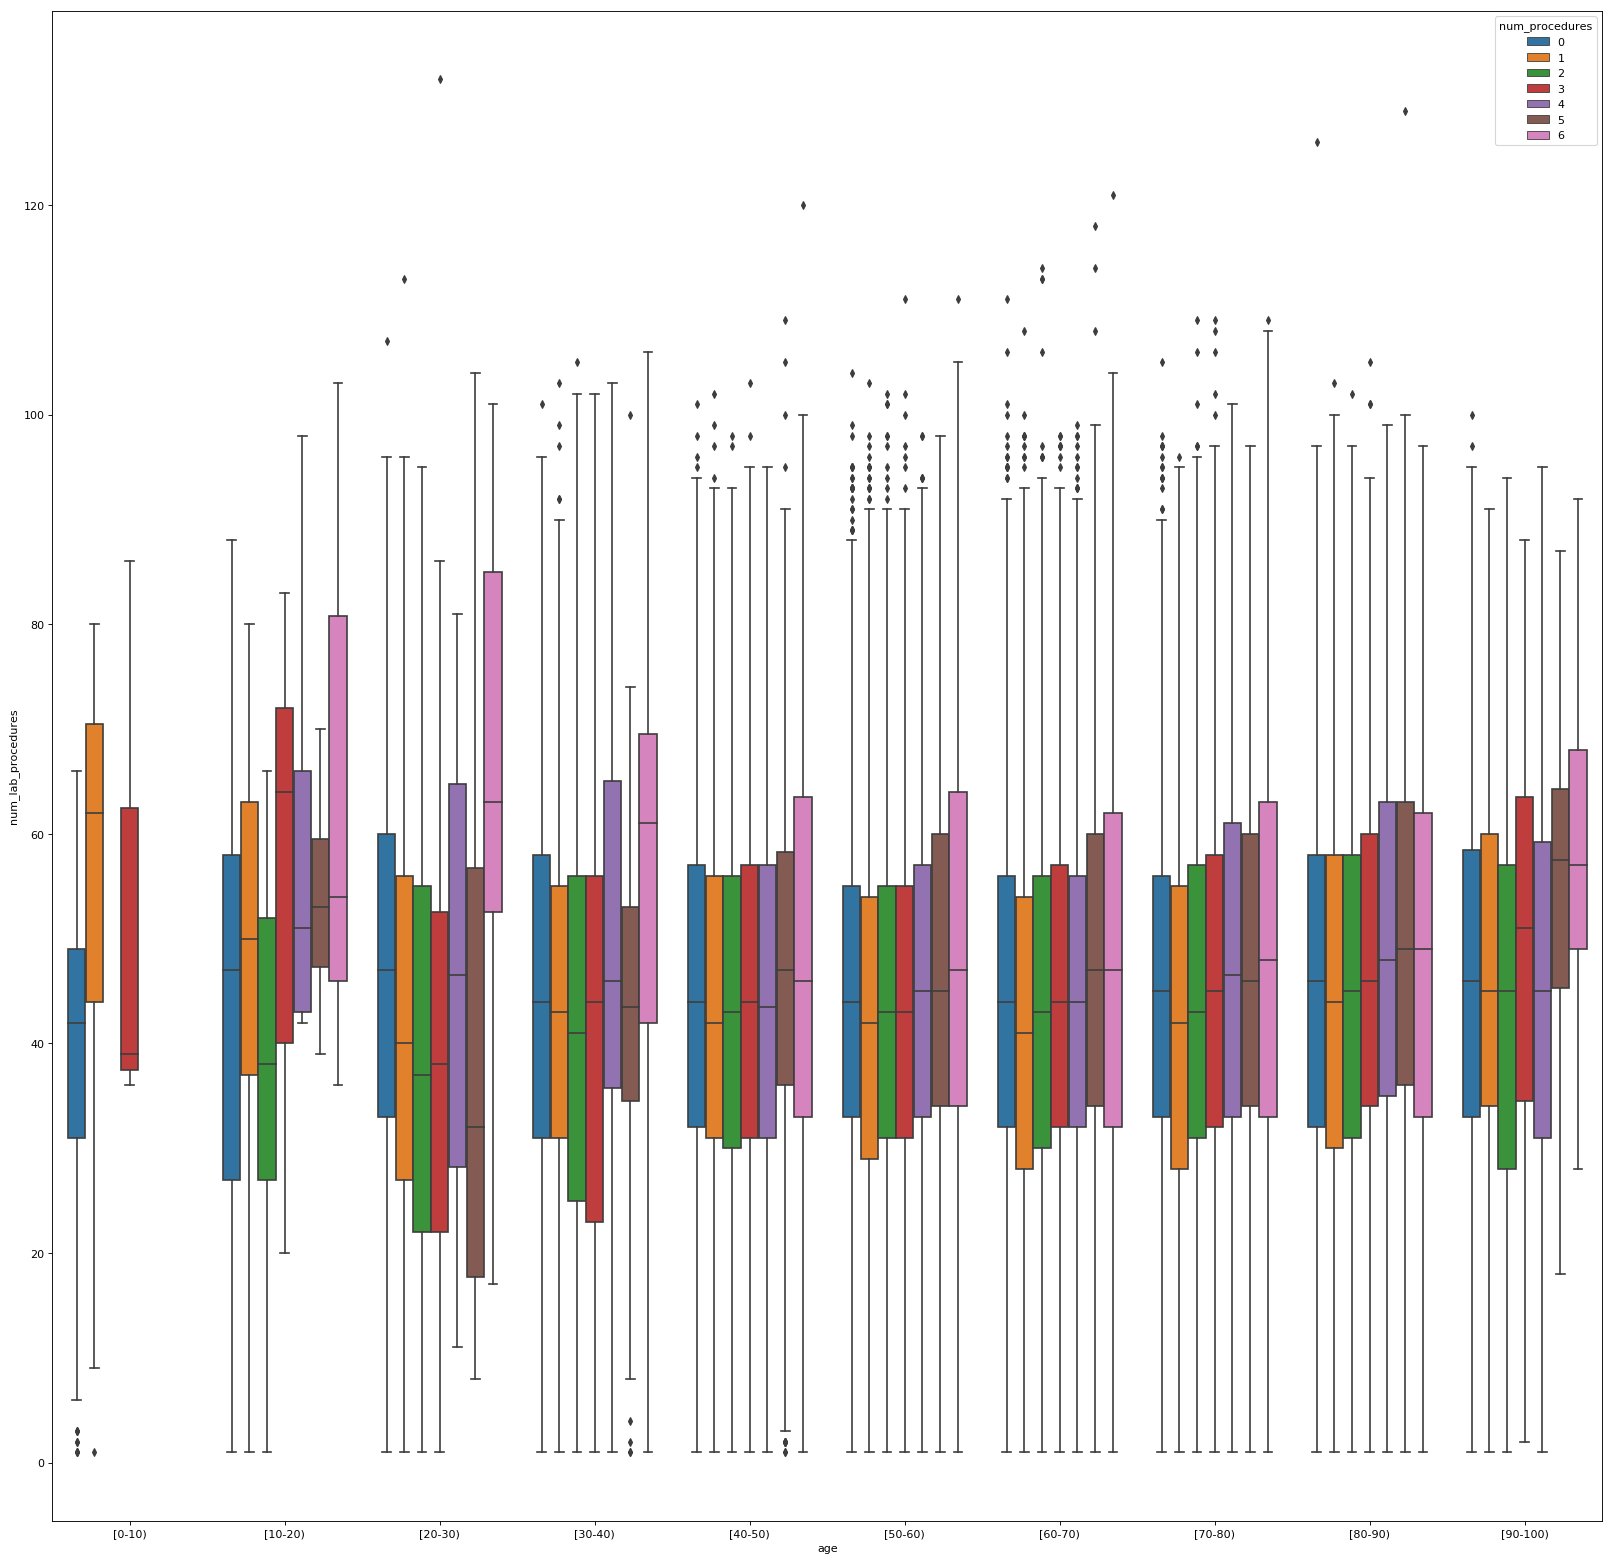

In [74]:
plt.figure(num=None, figsize=(25, 25), dpi=80, facecolor='w', edgecolor='k')

ax = sns.boxplot(x='age', y='num_lab_procedures', data=data, hue='num_procedures')

### We can see substantial numbers of outliers in 50-60, 60-70 age group.
 6 is most popular in 20-30 age group
People from older from 50 is taking wide number of procegers
There is limited number of procegers for 0-10 age group ###

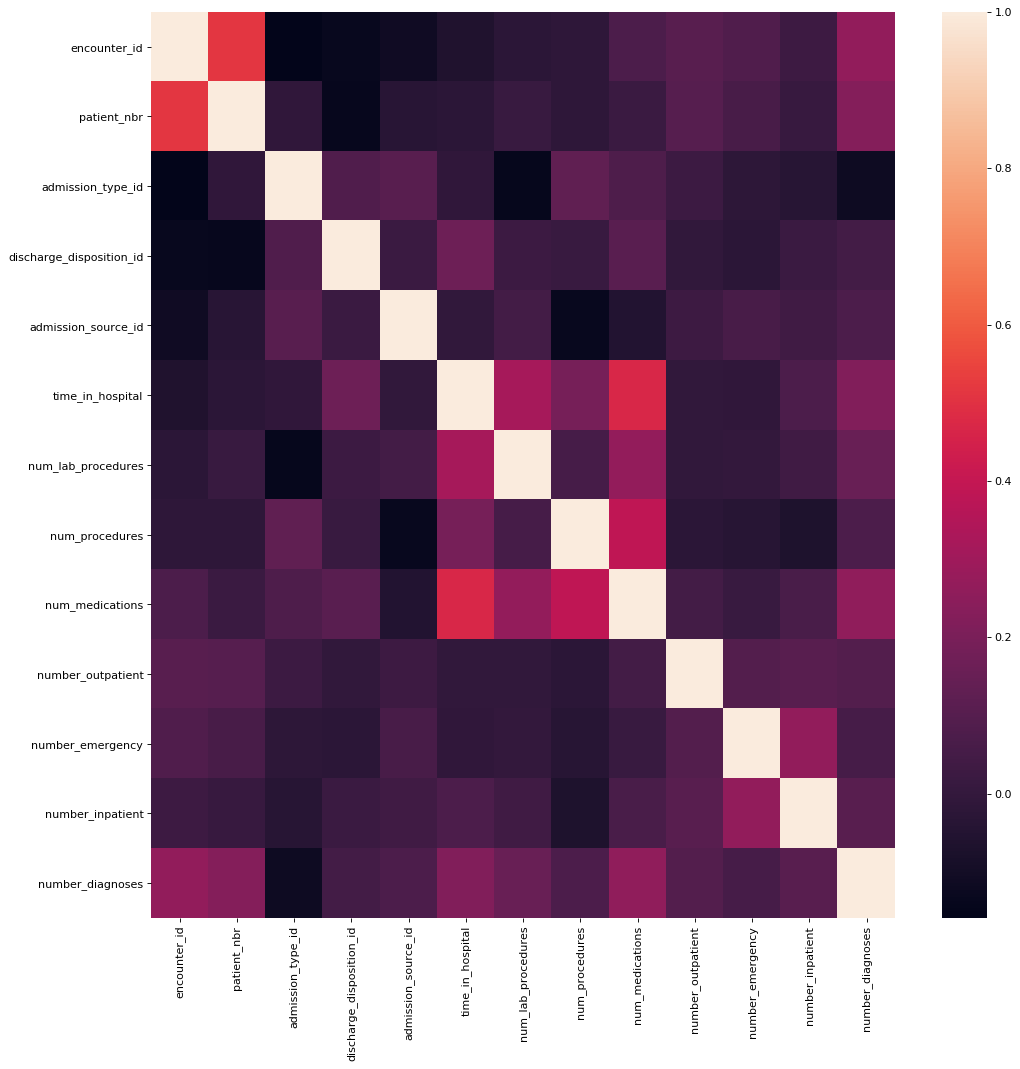

In [86]:
corr = newdf.corr()
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')

sns.heatmap(corr)

** We clear can see that 3 factors are really related to the time patients spend in hospitals - number of provides, number of medical, number of lab providers 

In [89]:
rmattix = newdf.corr().style.background_gradient(cmap="coolwarm")
rmattix

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1,0.512028,-0.158961,-0.132876,-0.112402,-0.0622206,-0.0260623,-0.0142248,0.0761133,0.103756,0.0828025,0.030962,0.265149
patient_nbr,0.512028,1,-0.0111281,-0.136814,-0.0325684,-0.0240922,0.0159463,-0.0155701,0.0206645,0.103379,0.062352,0.0124803,0.226847
admission_type_id,-0.158961,-0.0111281,1,0.0834832,0.106654,-0.0124997,-0.143713,0.129888,0.0795349,0.0265105,-0.0191161,-0.0381612,-0.117126
discharge_disposition_id,-0.132876,-0.136814,0.0834832,1,0.0181927,0.162748,0.0234148,0.0159211,0.108753,-0.00871513,-0.0244712,0.0207875,0.046891
admission_source_id,-0.112402,-0.0325684,0.106654,0.0181927,1,-0.00696533,0.0488847,-0.1354,-0.0545331,0.0272444,0.0598918,0.0363142,0.0721144
time_in_hospital,-0.0622206,-0.0240922,-0.0124997,0.162748,-0.00696533,1,0.31845,0.191472,0.466135,-0.00891592,-0.00968096,0.0736226,0.220186
num_lab_procedures,-0.0260623,0.0159463,-0.143713,0.0234148,0.0488847,0.31845,1,0.0580656,0.268161,-0.00760225,-0.00227946,0.0392311,0.152773
num_procedures,-0.0142248,-0.0155701,0.129888,0.0159211,-0.1354,0.191472,0.0580656,1,0.385767,-0.0248187,-0.0381793,-0.0662361,0.0737338
num_medications,0.0761133,0.0206645,0.0795349,0.108753,-0.0545331,0.466135,0.268161,0.385767,1,0.0451973,0.0131799,0.0641944,0.261526
number_outpatient,0.103756,0.103379,0.0265105,-0.00871513,0.0272444,-0.00891592,-0.00760225,-0.0248187,0.0451973,1,0.0914586,0.107338,0.094152


## Here is numerical data that support such dependence

<Figure size 1200x1200 with 0 Axes>

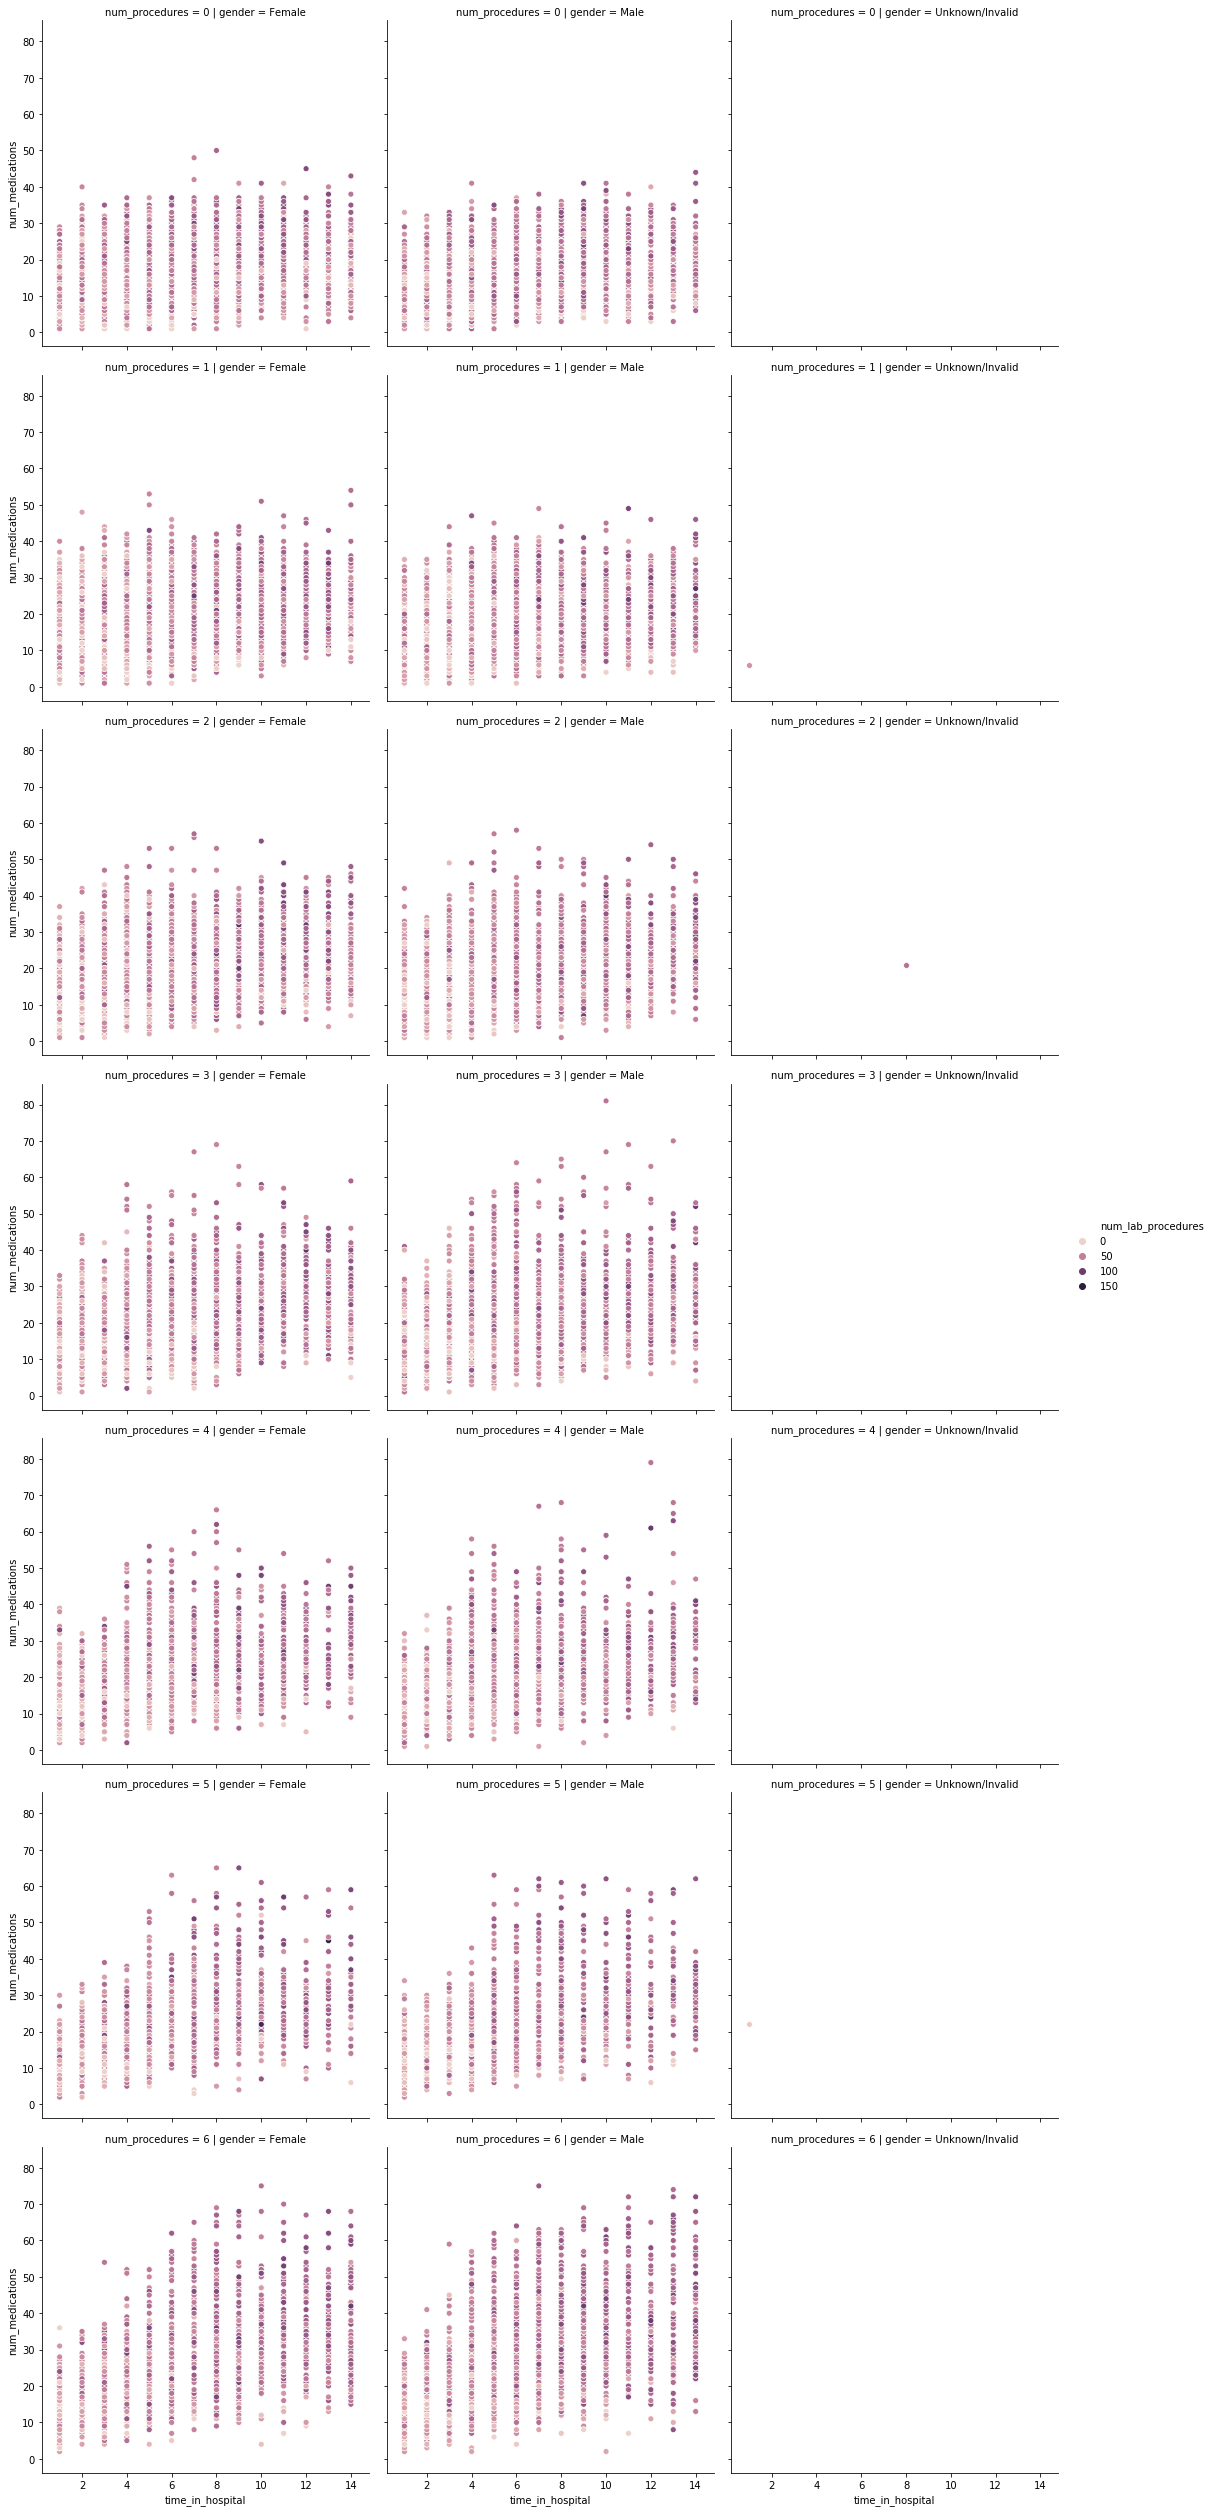

In [100]:
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')


sns.relplot(x="time_in_hospital", y="num_medications", hue='num_lab_procedures', col='gender', 
            row='num_procedures',
            data=data)
plt.show();

We can see here next
1. there is no substantial diff between genders
2. the more procigers take the more time people spend in hospical
3. more aged people take more than 3 proceegers
4. Some people state as no gender

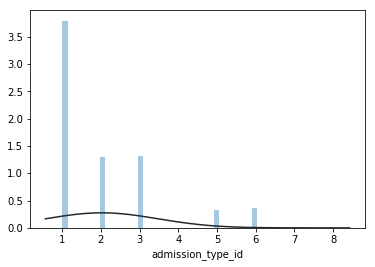

In [127]:
from scipy.stats import norm

sns.distplot(data['admission_type_id'], fit=norm, kde=False)

most of the customers comes form Emergency

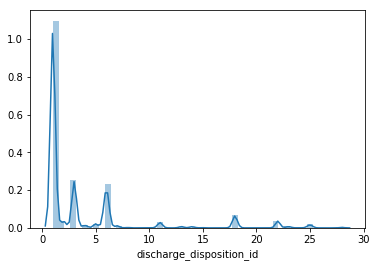

In [131]:
sns.distplot(data['discharge_disposition_id']) 

Discharged to home is the most resulted in hospital

### Some notes


1. admission_type_id, discharge_disposition_id, admission_source_id - is reall cat values
2. some data is not correct - gender